# MA124 Maths by Computer: Assignment 3 
## Part A: Monte Carlo Integration

Student number: 2106983

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

We consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = -\sin(x)/x$, $a=\pi$ and $b = 4\pi$. Since $\sin(x)/x$ does not have an elementary antiderivative we must use numerical methods to evaluate this integral.

### Approach 1:

Approach 1 uses Monte Carlo to estimate the mean value of the function ($\bar f$) over the interval [$\pi$,4$\pi$] and then as we know the mean value is equal to the integral divided by $b-a$, an estimate of the integral is equal to our estimate of the mean value ($\bar f$) multiplied by $b-a$.

This is seen in the plot below which shows the function f(x) and the rectangle with width $b-a$ and height $\bar f$, points $(\pi,0)$,$(4\pi,0)$,$(\pi,\bar f)$,$(4\pi,\bar f)$

In [2]:
# define the function to integrate
def my_fun(x):
    '''returns the value of -sin(x) divided by x'''
    return -np.sin(x)/x

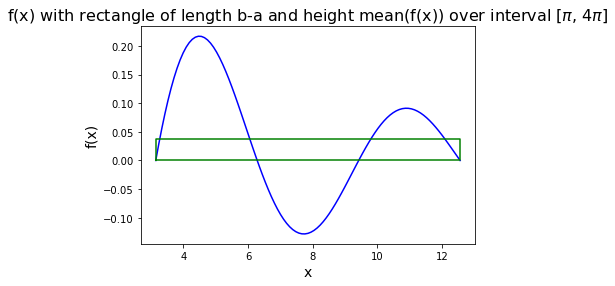

the Monte Carlo estimate (using Approach 1) for the integral is 0.360500868626384


In [3]:
# set the interval [pi,4pi] and the number of samples (10^6)
a, b = np.pi, 4*np.pi
N = 10**6

# generate the samples and evaluate f at each 
x = np.random.uniform(a, b, N)
f_of_x = my_fun(x)

# compute the mean and estimate the integral
f_mean = np.mean(f_of_x)
my_integral = (b-a) * f_mean

# plot the function and rectange with sides b-a and f_mean
x_plot = np.linspace(a, b, 101)
y_plot = my_fun(x_plot)
plt.plot(x_plot ,y_plot, 'b')
plt.plot([a,b,b,a,a],[0,0,f_mean, f_mean,0], 'g')
plt.title("f(x) with rectangle of length b-a and height mean(f(x)) over interval [$\pi$, 4$\pi$]",fontsize=16)
plt.xlabel("x",fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.show()

# print the estimated value
print("the Monte Carlo estimate (using Approach 1) for the integral is", my_integral)

### Approach 2:

Approach 2 uses Monte Carlo in another way to generate samples in a rectangular region and then using the knowledge that the integral is equal to the signed area under the curve (between x axis and y=f(x)). 

It is clear to see from the plot that some regions contribute positively and negatively so we will also need to take that into account. We will do this by working out the positive areas first and then the negative area and taking it away to give our total area.

We will use the fact that
$$
\frac{\text{Number inside curve}}{\text{N}} \simeq 
\frac{\text{Area of curve}}{\text{Area of rectangle}}
$$

to compute the areas individually.

The plot below shoes f(x) and coloured points, coloured based on what region they're in, which is used to work out the areas.

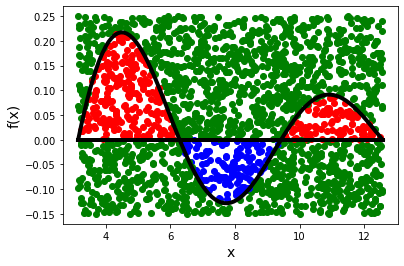

the Monte Carlo estimate (using Approach 2) for the integral is 0.33740705099554386


In [4]:
# Generate N random numbers inside a rectangle [pi, 4pi]x[-0.15,0.25]
a, b = np.pi, 4*np.pi
c, d = -0.15, 0.25
N = 2000
x = np.random.uniform(a, b, N)
y = np.random.uniform(c, d, N)
total1=0
total2=0
# Plotting those inside the curve contributing positively as red and adding 1 to total1.
# Plotting those inside the curve contributing negatively as blue and adding 1 to total2.
# Plotting those outside the curve (not contributing) as green.
for i in range(N):
    if my_fun(x[i])>y[i] and y[i]>0:
        plt.plot(x[i], y[i],'or')
        total1+=1
    elif my_fun(x[i])<y[i] and y[i]<0:
        plt.plot(x[i], y[i],'ob')
        total2+=1
    else:
        plt.plot(x[i], y[i], 'og')

# plot f(x) in black, 'k'
x_plot = np.linspace(a, b, 101)
plt.plot(x_plot,my_fun(x_plot),'k',lw=4)
plt.plot(x_plot,0*x_plot, 'k',lw=4)
plt.xlabel("x",fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.show()

# calculate positive areas of curve
rectA=(b-a)*(d-c) # area of rectangle
pcurvA=rectA*total1/N # positive area of curve

# calculate the negative area of curve
rectA=(b-a)*(d-c) # area of rectangle
ncurvA=rectA*total2/N # negative area of curve

# compute overall area (integral and print)
print("the Monte Carlo estimate (using Approach 2) for the integral is", pcurvA-ncurvA)

the average RGB values of the plot above are (0.1575, 0.3887686274509804, 0.068)



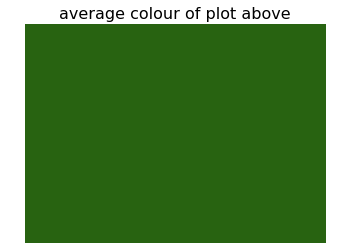

In [5]:
# find rgb values for points using colour picker
r=(1,0,0) #red rgb value
b=(0,0,1) #blue rgb value
g=(0,128/255,0) #green rgb value 

# total1 is equal to how many red dots there are
red=total1

# total2 is equal to how many blue dots there are
blue=total2

# 2000 minus these 2 values is how many green dots there are
green=2000-total1-total2

# compute mean R,G,B values separately
meanR=(red*r[0]+blue*b[0]+green*g[0])/N
meanG=(red*r[1]+blue*b[1]+green*g[1])/N
meanB=(red*r[2]+blue*b[2]+green*g[2])/N

# assign these values to meanRGB
meanRGB = meanR, meanG, meanB
print("the average RGB values of the plot above are",meanRGB)
print()
# plot a square with the mean colour
plt.plot(0.5, 0.5, 's', markersize=300, color = meanRGB)
plt.axis('off')
plt.title("average colour of plot above" ,fontsize=16)
plt.show()